In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess
import ffmpeg
from PIL import Image,ImageColor


# importing vlc module
  
# importing pafy module
import pafy
os.add_dll_directory(r'C:\Program Files\VideoLAN\VLC')
import vlc


In [2]:
ipd.Video('epi5.mp4', width=700)


In [6]:
# url of the video
url = "https://www.youtube.com/watch?v=C0DPdy98e4c"
  
vPafy = pafy.new(url)
play = vPafy.getbest(preftype="mp4")
vid = play.url
#vid = cv2.VideoCapture(sample)

In [3]:
def getvid(best):
    x=best
    return x
vid=getvid()

In [7]:
def capture(vid):
    # Load in video capture
    cap = cv2.VideoCapture(vid)
    # Total number of frames in video
    nof=cap.get(cv2.CAP_PROP_FRAME_COUNT)

    # Video height and width
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    print(f'Height {height}, Width {width}')

    # Get frames per second
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(fps)
    print(f'FPS : {fps:0.2f}')
    return cap,height,width,nof,fps


In [8]:
capture(vid)

Height 360.0, Width 480.0
25.0
FPS : 25.00


(< cv2.VideoCapture 000001CA3894AAD0>, 360.0, 480.0, 415.0, 25.0)

Height 360.0, Width 480.0
25.0
FPS : 25.00


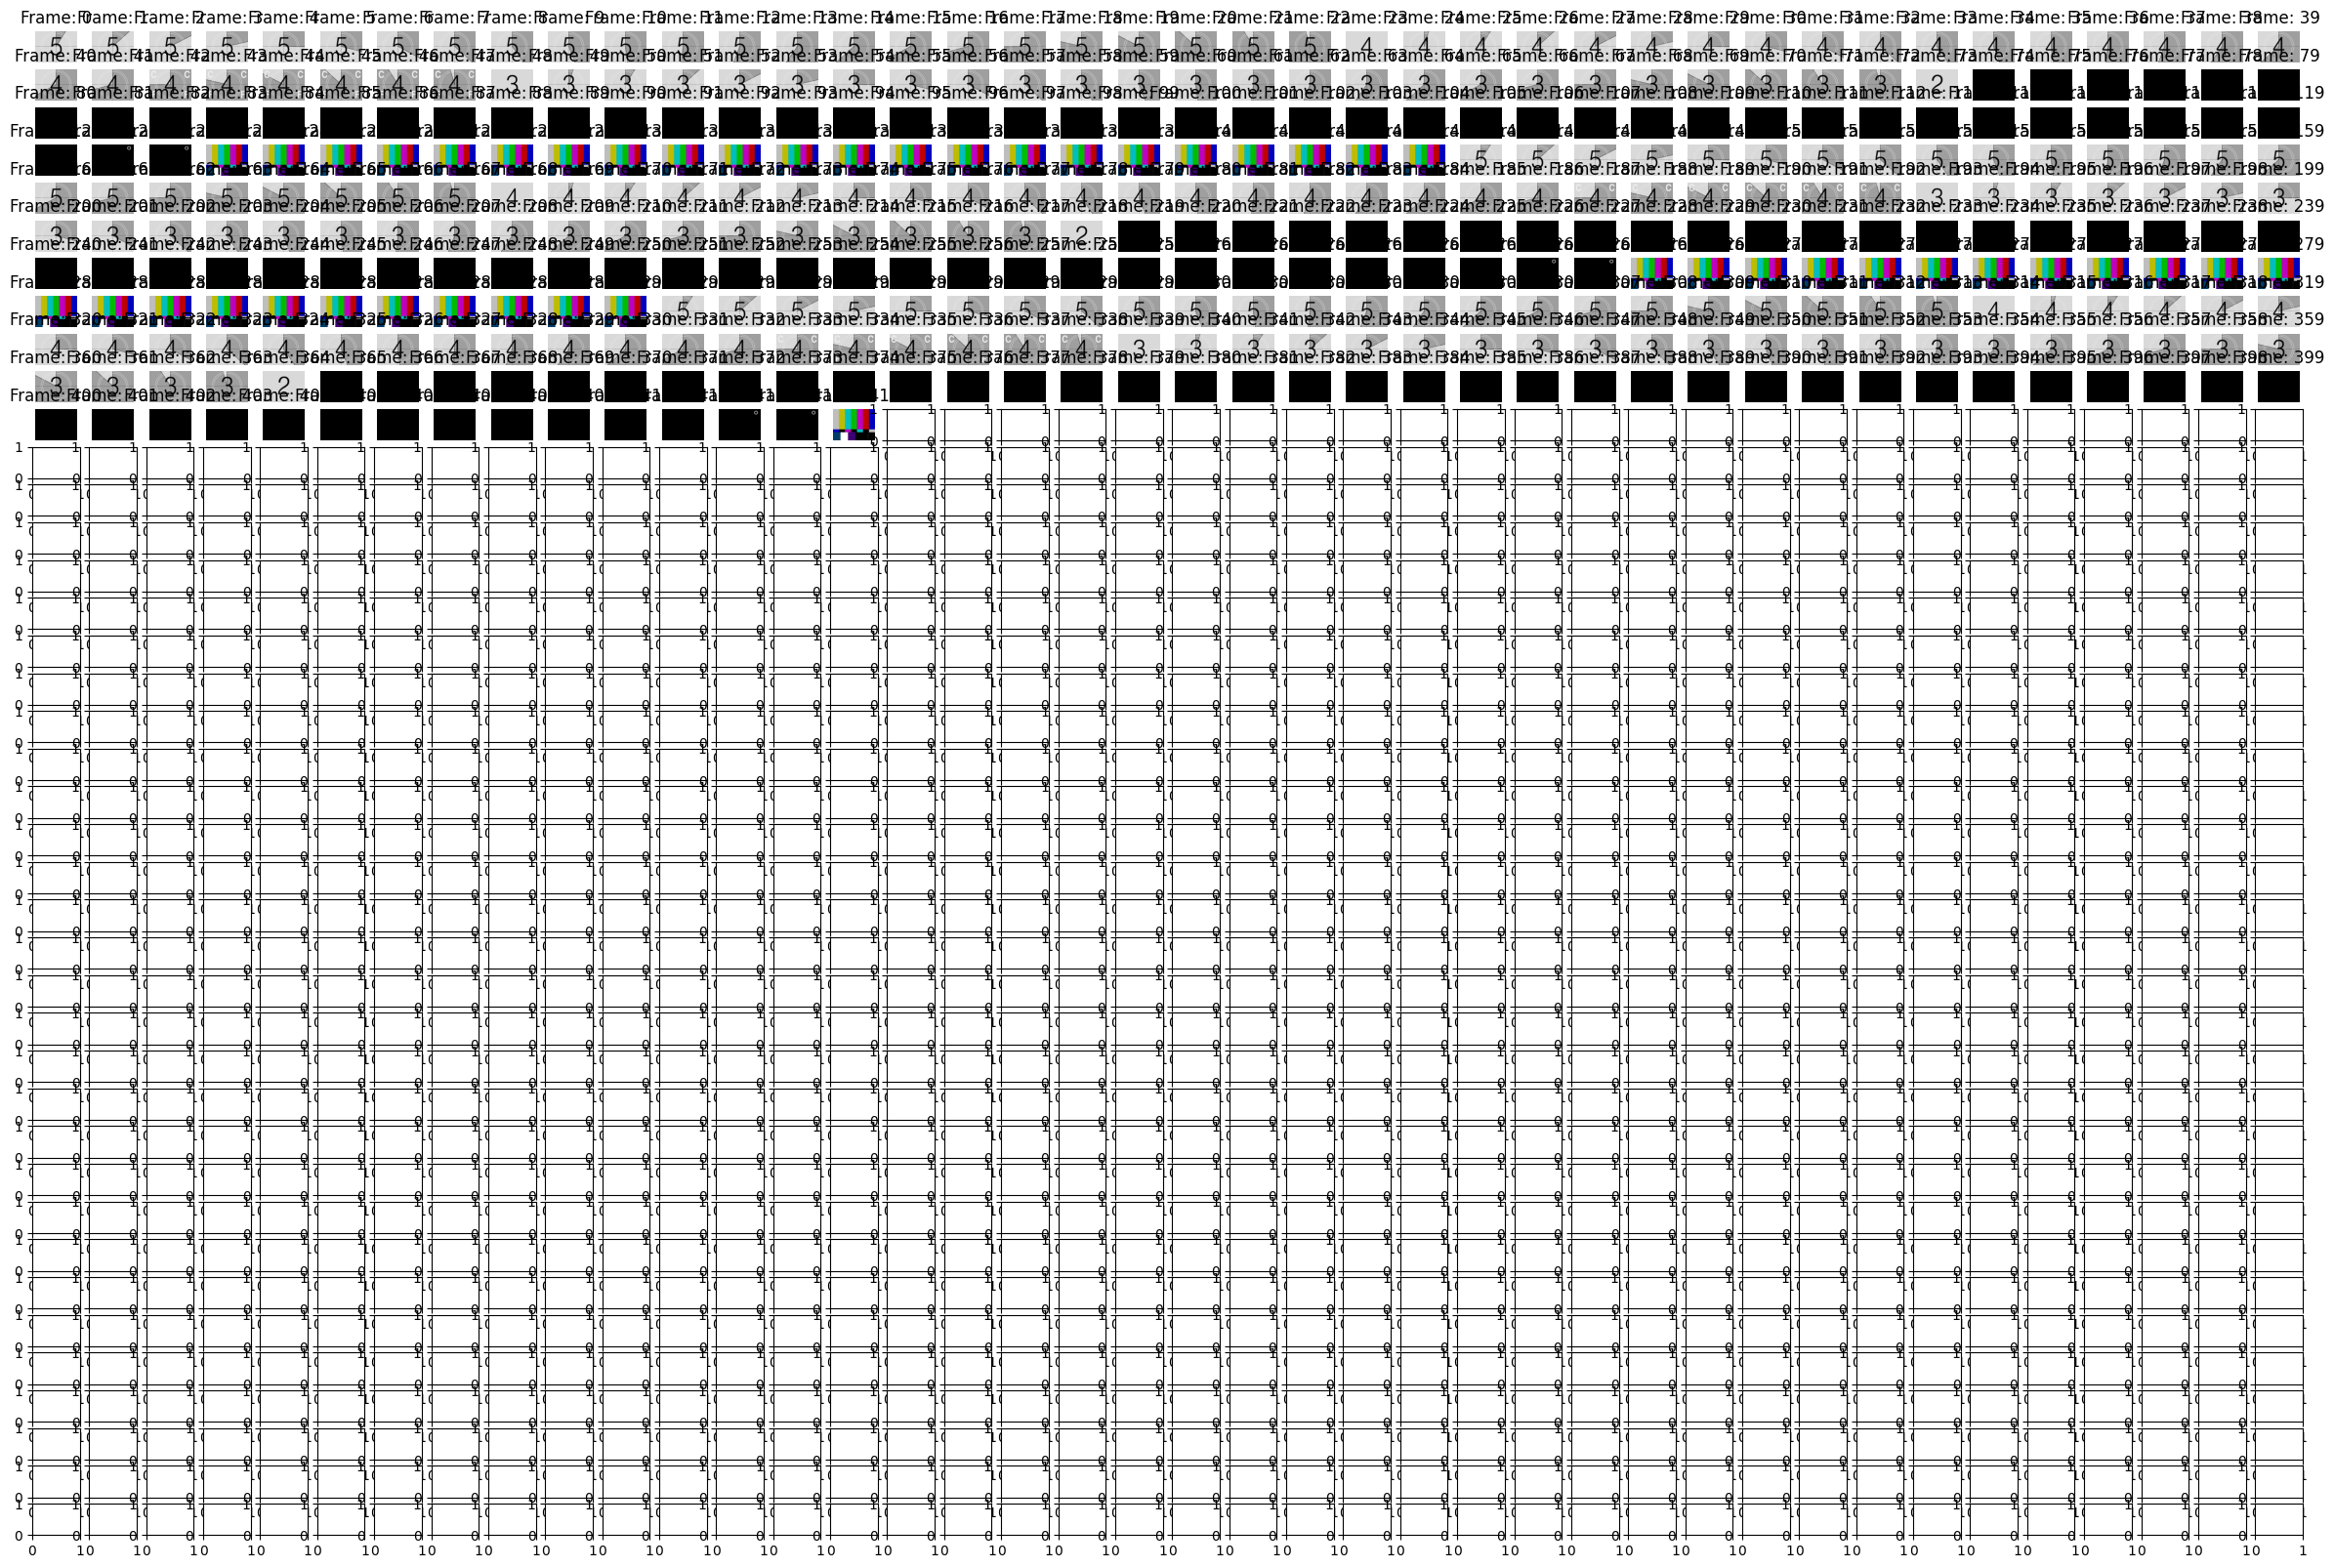

In [9]:
#display all frames of video 

fig, axs = plt.subplots(40, 40, figsize=(30, 20))
axs = axs.flatten()
cap,height,width,nof,fps=capture(vid)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 1 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

#plt.tight_layout()
plt.show()
cap.release()

In [6]:
#gamma correction of pixel

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)


In [7]:
#relative luminance of each pixel

def RelLum(arr):
    Y= 0.2126*(arr[0]/255) + 0.7152*(arr[1]/255) + 0.0722*(arr[2]/255)
    return Y

In [8]:
#perceived lightness

def PerLight(arr):
    if (arr<=.008856):
        x=arr*903.3
    else:
        x=((arr**(1/3))*116)-16
    return x

In [9]:
def avg_perlight(arr):
    arr_sum=np.sum(arr)
    n=sh1*sh2*sh3
    summation=arr_sum/n
    return summation


In [10]:
cap,height,width,nof,fps=capture(vid)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
arr7=[]
img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 1 == 0:
        img1=cv2.resize(img,(200,200))
        gammaImg = gammaCorrection(img1, 10)
        #cv2.imshow('Original image', img)
        #cv2.imshow('Gamma corrected image', gammaImg)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        shape_1=gammaImg.shape
        print(shape_1)
        sh1=shape_1[0]
        sh2=shape_1[1]
        sh3=shape_1[2]
        arr=[]
        arr1=[]
        arr2=[]
        arrRelLum=[]
        for i in range(0,sh1):
            for j in range(0,sh2):
                for k in range(0,sh3):
                    x=gammaImg[i,j,k]
                    arr.append(x)
                arr1.append(arr)
                arr=[]
            arr2.append(arr1)
            arr1=[]
        #print(np.shape(arr2))
        #print(arr2)

        arr3=[]
        arr4=[]
        for i in range(0,sh1):
            for j in range(0,sh2):
                x=RelLum(arr2[i][j])
                arr3.append(x)
            arr4.append(arr3)
            arr3=[]
        #print(arr4)
        #print(np.shape(arr4))

        arr5=[]
        arr6=[]
        for i in range(0,sh1):
            for j in range (0,sh2):
                y=PerLight(arr4[i][j])
                arr5.append(y)
            arr6.append(arr5)
            arr5=[]
        #print(arr6)

        m=avg_perlight(arr6)
        arr7.append(m)

Height 360.0, Width 640.0
FPS : 30.00
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200,

In [11]:
arr8=arr7
print(arr8)

[23.27169794739195, 29.495125484135947, 29.500205291294805, 22.904576743299256, 22.90438937740692, 23.040761269807483, 29.4526733414905, 25.516926050821684, 25.534876183907215, 25.53579912184869, 28.399971084181285, 27.120809025516845, 26.90543105062901, 28.700654389812453, 28.70030337451736, 28.744516764314394, 29.15755986796734, 29.045394330510494, 29.1250760009869, 29.122360497513785, 28.059987422218096, 29.32141339425797, 29.325319541893457, 23.566389328259348, 23.546153863045248, 23.554364529439066, 29.150573760078405, 23.985565694859027, 24.00833499662074, 24.00398611309558, 28.649954866110853, 25.60733646337018, 25.703151354150044, 28.32664595056511, 28.328327676566527, 28.30461408432168, 27.58221790107425, 28.43676473010039, 28.587451665053152, 28.583922790833142, 28.64746006172883, 26.946873084447297, 26.943709995231504, 26.51466365070036, 26.556639519067318, 26.875708728114947, 27.995103149022146, 23.45224287824823, 23.459556077644045, 23.456331524457845, 27.646468387325772, 

In [12]:
ctr=0
arr9=[]

for i in range(0,len(arr8)-1):
    if(abs(arr8[i+1]-arr8[i])>10 ):
        arr9+=['danger']
    else:
        arr9+=['not danger']


In [13]:
print(arr9)
print(len(arr9))

['not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not 

In [14]:
def dangerlevel(ct):
    if (ct<5):
      danger_level= 'NULL'
    elif (ct>5 and ct<10):
      danger_level= 'C'
    elif (ct>10 and ct<15):
      danger_level='B'
    else:
      danger_level='A'
    return danger_level

In [15]:
def split(arr,chunk_size):
    
  for i in range(0, len(arr), chunk_size):
    yield arr[i:i + chunk_size]

chunk_size = int(fps)
print(chunk_size)
x=list(split(arr9, chunk_size))

30


In [16]:
for i in range(0,len(x)):
    x[i] += ['NULL'] * (chunk_size - len(x[i]))
    print(x[i])
    print(len(x[i]))

['not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger']
30
['not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger']
30
['not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger', 'not danger

In [17]:
def flashdetect(arr):
    ct=0
    ctarr=[]
    ctr2=0
    firstdanger=[]
    lastdanger=[]
    f=True
    for i in range(len(arr)):
        ct=0
        f=True
        for j in range(0,len(arr[i])-1):
            if (arr[i][j]==arr[i][j+1] and arr[i][j+1]=='danger'):
                ct=ct+1
                lastdanger1=ctr2
            if (ct==1 and f==True):
               print("Frame Number",ctr2)
               firstdanger.append(ctr2)
               f=False
            ctr2+=1
        if (ct<5):
            x=dangerlevel(ct)
            print("These frames are safe! and so are you :)")
            print("Danger level "+ x)
            print("The number of dangerous transitions inlvoved were:",ct)
        elif ((ct>5) and (ct<10)):
            x=dangerlevel(ct)
            print("These frames are not safe! ")
            print("Danger level "+ x)
            print("The number of dangerous transitions inlvoved were:",ct)
        elif ((ct>10) and (ct<15)):
            x=dangerlevel(ct)
            print("These frames are dangerous!")
            print("Danger level "+ x)
            print("The number of dangerous transitions inlvoved were:",ct)
        else:
            x=dangerlevel(ct)
            print("These frames are extremely dangerous!")
            print("Danger level "+ x)
            print("The number of dangerous transitions inlvoved were:",ct)
        ctr2+=1
        if ct>5:
            lastdanger.append(lastdanger1)
        elif ct>1 and ct<4:
            firstdanger.pop()
        ctarr.append(ct)
    return ctarr,firstdanger,lastdanger

In [18]:
l,z,k=flashdetect(x)
print(l)
print(z)
print(k)

These frames are safe! and so are you :)
Danger level NULL
The number of dangerous transitions inlvoved were: 0
These frames are safe! and so are you :)
Danger level NULL
The number of dangerous transitions inlvoved were: 0
These frames are safe! and so are you :)
Danger level NULL
The number of dangerous transitions inlvoved were: 0
Frame Number 111
These frames are safe! and so are you :)
Danger level NULL
The number of dangerous transitions inlvoved were: 2
Frame Number 121
These frames are not safe! 
Danger level C
The number of dangerous transitions inlvoved were: 6
Frame Number 151
These frames are not safe! 
Danger level C
The number of dangerous transitions inlvoved were: 6
Frame Number 181
These frames are not safe! 
Danger level C
The number of dangerous transitions inlvoved were: 6
Frame Number 211
These frames are not safe! 
Danger level C
The number of dangerous transitions inlvoved were: 6
Frame Number 241
These frames are not safe! 
Danger level C
The number of dangerous

In [19]:
timestamparr=[]
cap,height,width,nof,fps=capture(vid)

frame_no = 0
while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists:
        print("for frame : " + str(frame_no) + "   timestamp is: ", str(cap.get(cv2.CAP_PROP_POS_MSEC)))
        x=cap.get(cv2.CAP_PROP_POS_MSEC)
        timestamparr.append(x)
    else:
        break
    frame_no += 1
print(timestamparr)

cap.release()

Height 360.0, Width 640.0
FPS : 30.00
for frame : 0   timestamp is:  0.0
for frame : 1   timestamp is:  33.333333333333336
for frame : 2   timestamp is:  66.66666666666667
for frame : 3   timestamp is:  100.0
for frame : 4   timestamp is:  133.33333333333334
for frame : 5   timestamp is:  166.66666666666669
for frame : 6   timestamp is:  200.0
for frame : 7   timestamp is:  233.33333333333334
for frame : 8   timestamp is:  266.6666666666667
for frame : 9   timestamp is:  300.0
for frame : 10   timestamp is:  333.33333333333337
for frame : 11   timestamp is:  366.6666666666667
for frame : 12   timestamp is:  400.0
for frame : 13   timestamp is:  433.33333333333337
for frame : 14   timestamp is:  466.6666666666667
for frame : 15   timestamp is:  500.0
for frame : 16   timestamp is:  533.3333333333334
for frame : 17   timestamp is:  566.6666666666666
for frame : 18   timestamp is:  600.0
for frame : 19   timestamp is:  633.3333333333334
for frame : 20   timestamp is:  666.6666666666667
fo

In [20]:
diff=timestamparr[1]-timestamparr[0]
for i in range(1,len(timestamparr)):
    if (timestamparr[i]==0):
        timestamparr[i]=timestamparr[i-1]+diff
print(timestamparr)

[0.0, 33.333333333333336, 66.66666666666667, 100.0, 133.33333333333334, 166.66666666666669, 200.0, 233.33333333333334, 266.6666666666667, 300.0, 333.33333333333337, 366.6666666666667, 400.0, 433.33333333333337, 466.6666666666667, 500.0, 533.3333333333334, 566.6666666666666, 600.0, 633.3333333333334, 666.6666666666667, 700.0000000000001, 733.3333333333334, 766.6666666666667, 800.0, 833.3333333333334, 866.6666666666667, 900.0, 933.3333333333334, 966.6666666666666, 1000.0, 1033.3333333333335, 1066.6666666666667, 1100.0, 1133.3333333333333, 1166.6666666666667, 1200.0, 1233.3333333333335, 1266.6666666666667, 1300.0, 1333.3333333333335, 1366.6666666666667, 1400.0000000000002, 1433.3333333333333, 1466.6666666666667, 1500.0, 1533.3333333333335, 1566.6666666666667, 1600.0, 1633.3333333333333, 1666.6666666666667, 1700.0000000000002, 1733.3333333333335, 1766.6666666666667, 1800.0, 1833.3333333333335, 1866.6666666666667, 1900.0000000000002, 1933.3333333333333, 1966.6666666666667, 2000.0, 2033.3333

In [21]:
mapping = dict(zip(timestamparr,arr9))
for y in mapping:
    print (y,':',mapping[y])

0.0 : not danger
33.333333333333336 : not danger
66.66666666666667 : not danger
100.0 : not danger
133.33333333333334 : not danger
166.66666666666669 : not danger
200.0 : not danger
233.33333333333334 : not danger
266.6666666666667 : not danger
300.0 : not danger
333.33333333333337 : not danger
366.6666666666667 : not danger
400.0 : not danger
433.33333333333337 : not danger
466.6666666666667 : not danger
500.0 : not danger
533.3333333333334 : not danger
566.6666666666666 : not danger
600.0 : not danger
633.3333333333334 : not danger
666.6666666666667 : not danger
700.0000000000001 : not danger
733.3333333333334 : not danger
766.6666666666667 : not danger
800.0 : not danger
833.3333333333334 : not danger
866.6666666666667 : not danger
900.0 : not danger
933.3333333333334 : not danger
966.6666666666666 : not danger
1000.0 : not danger
1033.3333333333335 : not danger
1066.6666666666667 : not danger
1100.0 : not danger
1133.3333333333333 : not danger
1166.6666666666667 : not danger
1200.0

In [22]:
print(l)
print(z)
print(k)

[0, 0, 0, 2, 6, 6, 6, 6, 6, 6, 3, 3]
[121, 151, 181, 211, 241, 271]
[145, 175, 205, 235, 265, 295]


In [23]:
keylist=list(mapping.keys())
valuelist=list(mapping.values())
print(keylist)
print(valuelist)

[0.0, 33.333333333333336, 66.66666666666667, 100.0, 133.33333333333334, 166.66666666666669, 200.0, 233.33333333333334, 266.6666666666667, 300.0, 333.33333333333337, 366.6666666666667, 400.0, 433.33333333333337, 466.6666666666667, 500.0, 533.3333333333334, 566.6666666666666, 600.0, 633.3333333333334, 666.6666666666667, 700.0000000000001, 733.3333333333334, 766.6666666666667, 800.0, 833.3333333333334, 866.6666666666667, 900.0, 933.3333333333334, 966.6666666666666, 1000.0, 1033.3333333333335, 1066.6666666666667, 1100.0, 1133.3333333333333, 1166.6666666666667, 1200.0, 1233.3333333333335, 1266.6666666666667, 1300.0, 1333.3333333333335, 1366.6666666666667, 1400.0000000000002, 1433.3333333333333, 1466.6666666666667, 1500.0, 1533.3333333333335, 1566.6666666666667, 1600.0, 1633.3333333333333, 1666.6666666666667, 1700.0000000000002, 1733.3333333333335, 1766.6666666666667, 1800.0, 1833.3333333333335, 1866.6666666666667, 1900.0000000000002, 1933.3333333333333, 1966.6666666666667, 2000.0, 2033.3333

In [24]:
timestamparr=[]
cap,height,width,nof,fps=capture(vid)
c1=0

frame_no = 0
while(cap.isOpened()):
    frame_exists, curr_frame = cap.read()
    if frame_exists and (c1<len(z)):
        if frame_no==z[c1]:
            print("Danger begins at",keylist[frame_no])
        if frame_no==k[c1]:
            print("Danger ends at ",keylist[frame_no])
            c1+=1
    else:
        break
    frame_no += 1


Height 360.0, Width 640.0
FPS : 30.00
Danger begins at 4033.333333333333
Danger ends at  4833.333333333334
Danger begins at 5033.333333333333
Danger ends at  5833.333333333334
Danger begins at 6033.333333333333
Danger ends at  6833.333333333334
Danger begins at 7033.333333333334
Danger ends at  7833.333333333334
Danger begins at 8033.333333333333
Danger ends at  8833.333333333334
Danger begins at 9033.333333333334
Danger ends at  9833.333333333334


In [25]:
cap,height,width,nof,fps=capture(vid)
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',gammaCorrection(frame,10))
    i+=1

cap.release()
cv2.destroyAllWindows()

Height 360.0, Width 640.0
FPS : 30.00


In [ ]:
img_array = []
for filename in glob.glob('*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()